# Сборный проект

## Вам нужно выявить определяющие успешность игры закономерности.

Необходимо изучить вводные данные, подготовить их для удобных вычислений, посчитать метрики, проверить гипотезы, сделать выводы.

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
data=pd.read_csv('/datasets/games.csv')
display(data)
data.info()
data.describe()
data.isnull().sum()
data.duplicated().sum()


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


0

В столбцах  critic score, user_score, rating содержится до половины пропущенных значений. Заменить или удалить их нельзя, это очень важные критерии для последующих действий


In [2]:
data.columns=['name','platform','year_of_release','genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating']
#переименовал столбцы,чтобы все названия были с нижним регистром

В описании задания сказано, что в столбцах рейтинга есть значение tbd. Посмотрю где оно находится и сколько таких значений:

In [3]:
data.query('user_score == "tbd"') 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В столбце user_score содержится 2424 записи со значением tbd. TBD - To Be Determinated - будет определено. То есть пользователи еще не дали оценку для этой игры. По факту tbd означает отстутсвие оценки. Можно заменить tbd на Nan. Также переведу тип данных столбца user_score в дробные числа.

In [4]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Перевожу тип данных столбцов year_of_release и critic_score к целым числам

In [5]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['critic_score'] = data['critic_score'].astype('Int64')
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null Int64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.4+ MB


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Пропуски в critic_score, user_score и rating нельзя заменить медианными или средними значениями, это повлияет на дальнейший анализ. В year_of_release пропусков не так много, оставим так как есть. Посмотрим где находятся пропуски в name и genre.

In [6]:
data.query('name.isnull() & genre.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в name и genre находятся у одних и тех же игр. Можем удалить эти строки, они не повлияют на дальнейший анализ.

In [7]:
data['name'].replace('', np.nan, inplace=True) #преобразую пустые строки в объект np.nan
data.dropna(subset=['name'],inplace=True)
data.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Создам столбец, с данными о суммарных продажах:

In [8]:
data['global_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Исследовательский анализ данных

#### Сколько игр выпускалось в разные годы?

In [45]:
games_per_year=data[['year_of_release','name']].drop_duplicates().pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values('year_of_release',ascending=False)
#сводная таблица по годам выпуска и количеству игр


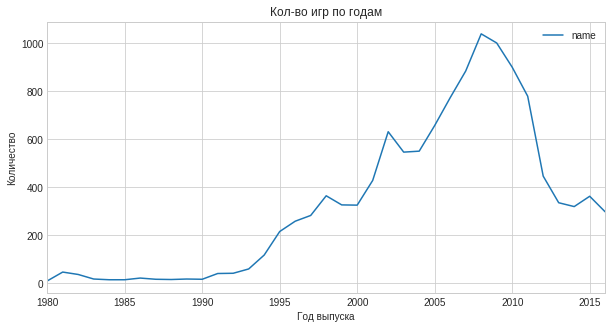

In [10]:
plt.style.use('seaborn-whitegrid')
games_per_year.plot(figsize=(10,5), title='Кол-во игр по годам').set(xlabel='Год выпуска', ylabel='Количество')
plt.show()

Рост выпуска игр начался а 1994 году вместе с выходом Sony Playstation. Пики на графике также отражают появления новых поколений игровых платформ. 
Для нашей задачи данные до 95 года не  важны. Вряд ли старые игры будут пользоваться популярностью у современнных геймеров.

#### Как менялись продажи по платформам

In [11]:
def platform_sales(df): #функция для расчета общих продаж по каждой платформе
    return df.pivot_table(index='platform', values='global_sales', aggfunc='sum').sort_values('global_sales', ascending=False)

In [12]:
def game_plot(df): #функция для построения графика
    df.plot(kind='bar', y='global_sales', figsize=(10,5)).set(xlabel='Платформа', ylabel='Глобальные продажи')
    plt.show()

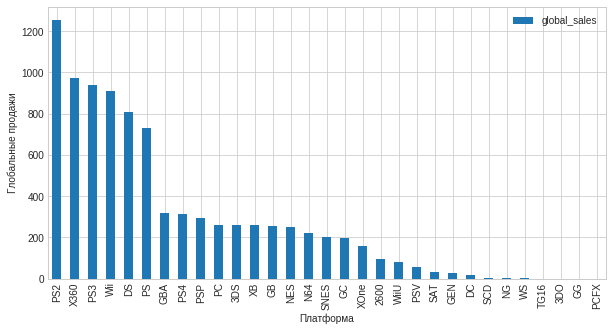

In [13]:
game_plot(platform_sales(data))

Посмотрим топ 5 платформ по продажам:

In [14]:
top=platform_sales(data).head()
top

,global_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


Посмотрим их распределение по годам:

In [15]:
def platform_sales_per_year(name, df): #функция для расчета количества продаж по годам для каждой платформы
    return df.query('platform == @name').pivot_table(index='year_of_release', values='global_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

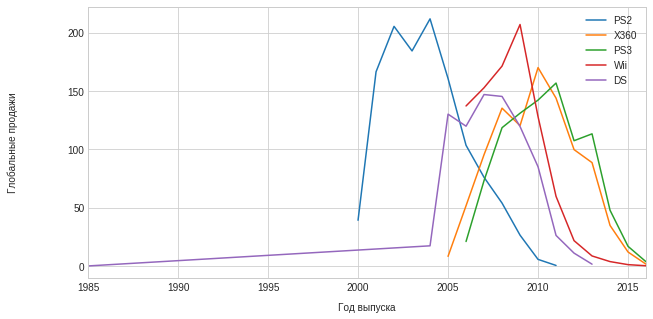

In [16]:
for platform in list(top.index):
    platform_sales_per_year(platform, data)['global_sales'].plot(figsize=(10,5), label=platform)
    plt.xlabel("Год выпуска", labelpad=10)
    plt.ylabel("Глобальные продажи", labelpad=50)
    plt.legend()

Почти кажда платформа имеет жизненый цикл в 10 лет.
Для наших целей достаточно смотреть данные за последние 10 лет - это и будет актуальным периодом

In [17]:
actual_years = (data['year_of_release'] > 2006) & (data['year_of_release'] <= 2016)
actual_games = data.loc[actual_years]

#### Какие платформы лидируют по продажам?

Посмотрим на глобальные продажи только за последние 10 лет:

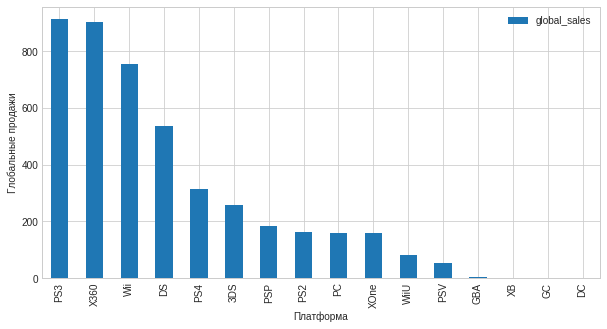

In [18]:
global_sales = platform_sales(actual_games)
game_plot(global_sales) #рейтинг платформ по продажам за актуальный период

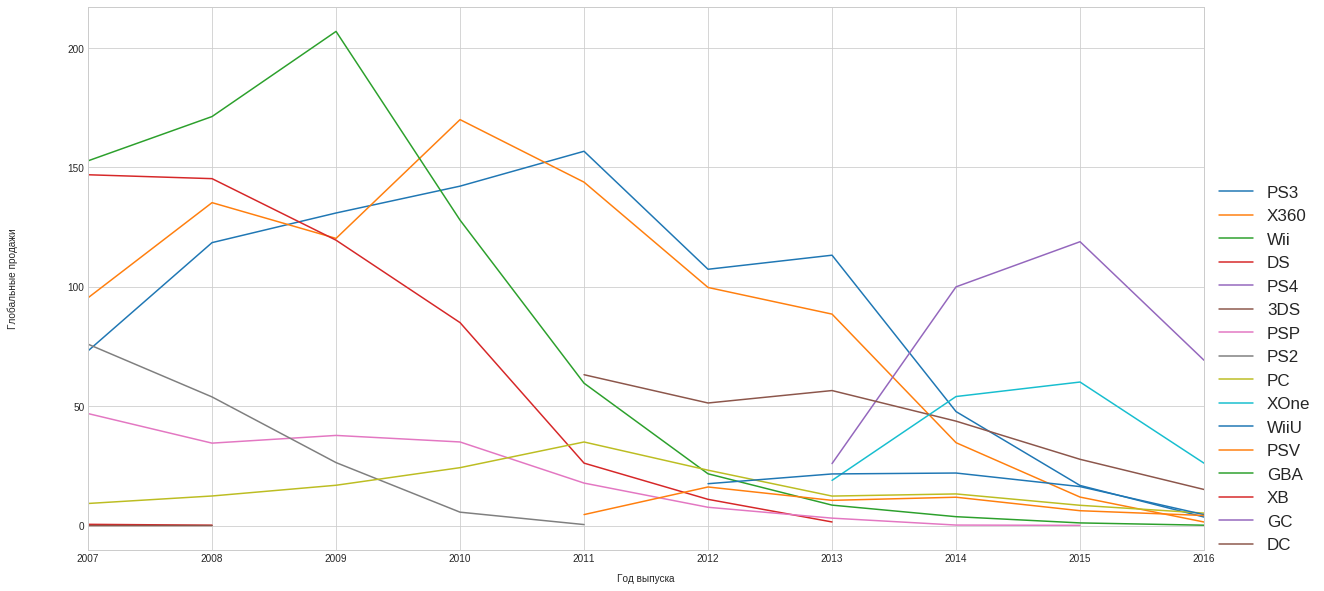

In [19]:
#Построю график чтобы посмотреть, какие из платформ падают или растут по продажам
for platform in list(global_sales.index):
    platform_sales_per_year(platform, actual_games)['global_sales'].plot(figsize=(20,10), label=platform)
    plt.xlabel("Год выпуска", labelpad=10)
    plt.ylabel("Глобальные продажи", labelpad=50)
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 0.7), fontsize=17, shadow=True)

По графику можно сказать, что объем продаж игр на большинстве платформ постепенно сокращается. Три самых популярных консоли в последнее время это PS4, XBoxOne, 3DS

#### Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [20]:
def sales_boxplot(title=None, query_condition = None, ylims=None): #функция для построения диаграммы размаха
    %matplotlib inline
    if query_condition == None:
        ax = data.boxplot(column='global_sales', fontsize=25, figsize=(25,10))
    else:
        df_query = data.query(query_condition)
        by_column = query_condition.split()[0]
        ax = df_query.boxplot(column='global_sales', by=by_column, fontsize=25, figsize=(25,10))
        ax.set_xlabel('')
        ax.set_title('')
    if ylims != None:
        ax.set_ylim(ylims)
    if title != None:
        plt.suptitle(title, y=0.94, fontsize=25, fontweight='bold')

Диаграмма размаха по всем продажам

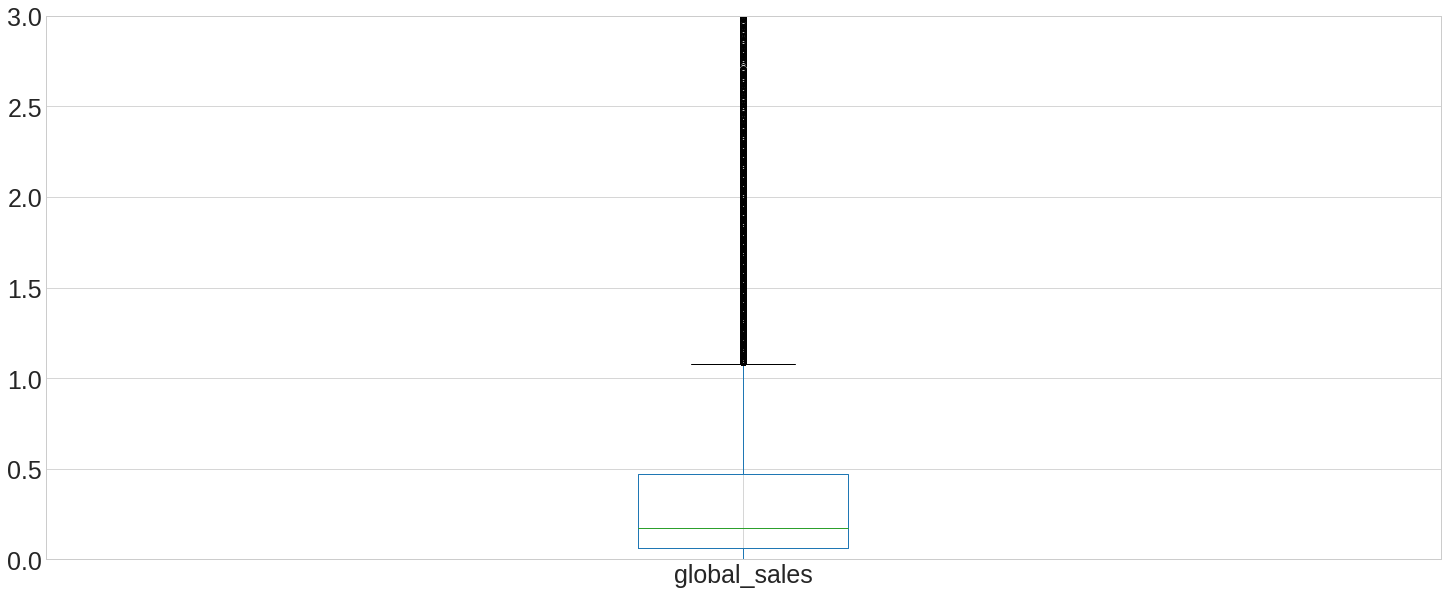

In [21]:
sales_boxplot(ylims=[0,3]) 

В среднем продажи игр составляют 1.1 млн. Медиана на уровне 100к долларов

Построю диаграмму размаха для наиболее популярных платформ:

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


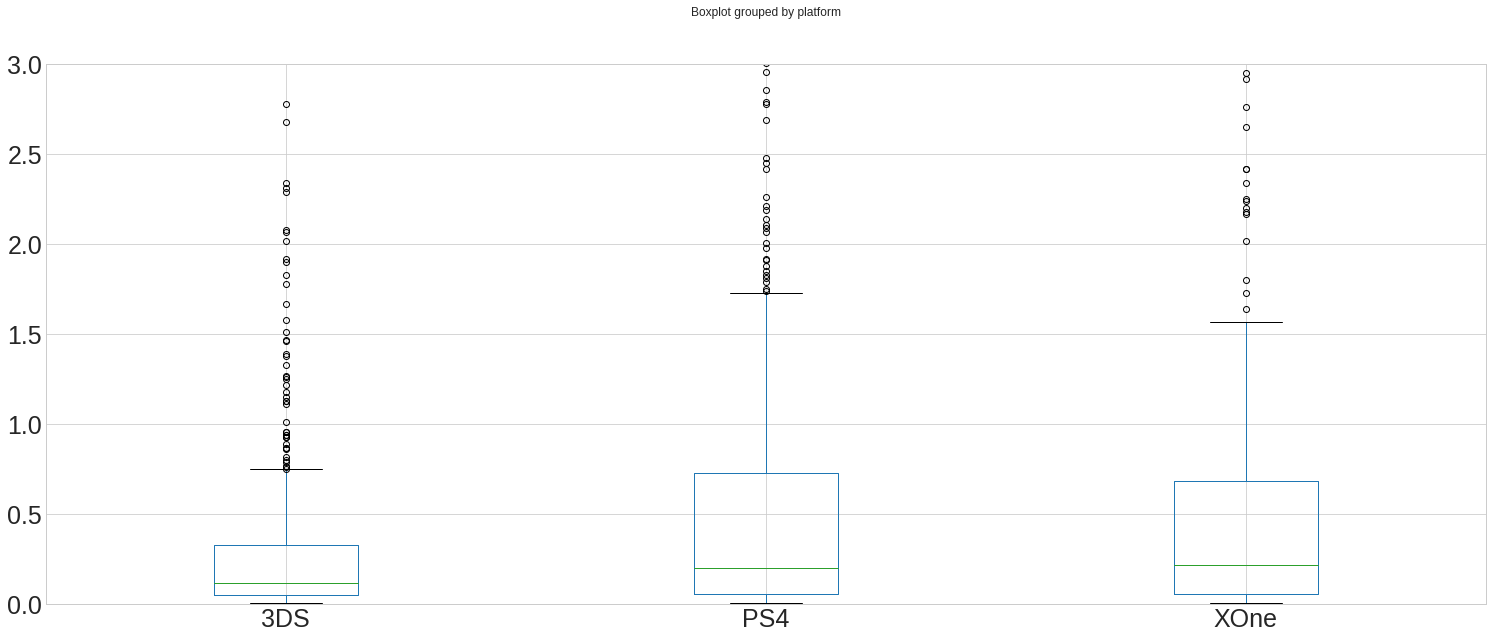

In [22]:
top_platforms=['PS4', 'XOne','3DS']
sales_boxplot(query_condition='platform in @top_platforms', ylims=[0,3])

У платформы 3DS в среднем продажи составляют 0.75 млн. 
У платформы PS4 в среднем продажи составляют 1.75 млн. 
У платформы XOne в среднем продажи составляют 1.6 млн. 

Медианны значения продаж у всех платформ находятся на уровне 100к долларов

#### Как влияют на продажи внутри одной платформы отзывы пользователей и критиков.

In [23]:
ps4 = actual_games.query('platform == "PS4"')
xbox = actual_games.query('platform == "XOne"')
ds = actual_games.query('platform == "3DS"')
correlations = ['user_score', 'critic_score', 'global_sales']

In [24]:
ps4[correlations].corr() #смотрю влияние оценок на продажи

,user_score,critic_score,global_sales
user_score,1.000000,0.557654,-0.031957
critic_score,0.557654,1.000000,0.406568
global_sales,-0.031957,0.406568,1.000000


In [25]:
xbox[correlations].corr()

,user_score,critic_score,global_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
global_sales,-0.068925,0.416998,1.000000


In [26]:
ds[correlations].corr()

,user_score,critic_score,global_sales
user_score,1.000000,0.745222,0.222078
critic_score,0.745222,1.000000,0.348740
global_sales,0.222078,0.348740,1.000000


Посмотрю зависимость оценок критиков и продаж на диаграмме рассеяния:

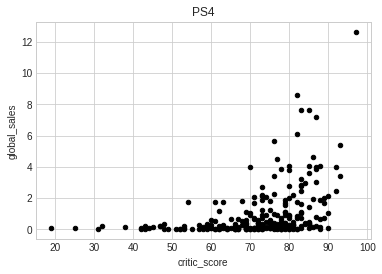

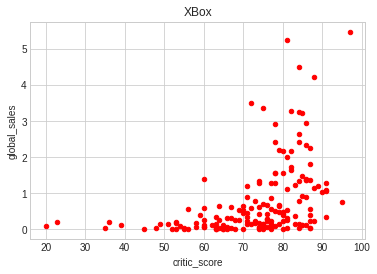

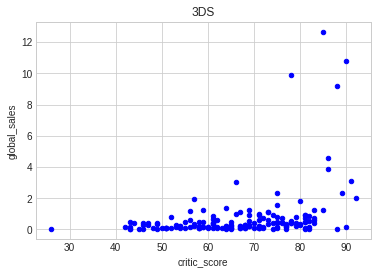

In [27]:
ps4.plot(kind='scatter', title='PS4', x='critic_score', y='global_sales', color='black')
xbox.plot(kind='scatter', title='XBox', x='critic_score', y='global_sales', color='red')
ds.plot(kind='scatter', title='3DS', x='critic_score', y='global_sales', color='blue')

Посмотрю зависимость оценок пользователей и продаж на диаграмме рассеяния:

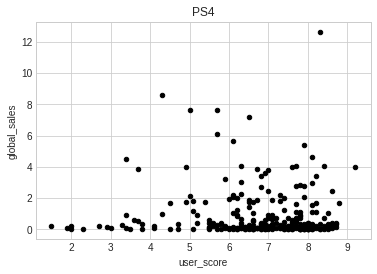

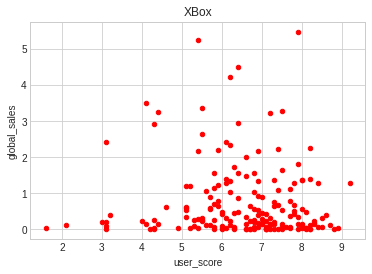

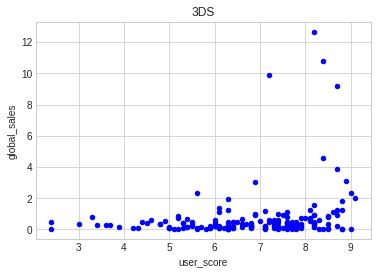

In [28]:
ps4.plot(kind='scatter', title='PS4', x='user_score', y='global_sales', color='black')
xbox.plot(kind='scatter', title='XBox', x='user_score', y='global_sales', color='red')
ds.plot(kind='scatter', title='3DS', x='user_score', y='global_sales', color='blue')

Вывод: для всех платформ между оценками пользователей и продажами нет взаимосвязи.
Влияние оценок критиков на продажи имеется, но очень маленькое.
У платформы 3ДС взаимосвязь между оценками пользователей и продажами гораздо выше, чем у других платформ, но все равно не достаточно высокая, чтобы утверждать, что высокие оценки поспосубствуют высоким продажам.

#### Общее распределение игр по жанрам

[Text(0, 0.5, 'Продажи'), Text(0.5, 0, 'Жанр')]

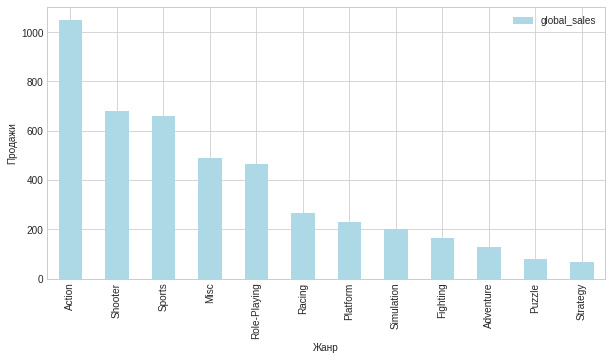

In [29]:
actual_games.pivot_table(index='genre', values='global_sales', aggfunc='sum').sort_values('global_sales', ascending=False)\
.plot(kind='bar', y='global_sales',figsize=(10,5), color='lightblue')\
.set(xlabel='Жанр', ylabel='Продажи')
#график общей суммы продаж по жанрам

По общей сумме продаж с большим отрывом лидирует жанр Action. За ним Shooter и Sports.
Меньше всего приносят денег жанры Puzzle и Strategy

# Составьте портрет пользователя каждого региона

#### Самые популярные платформы для каждого региона.

##### Северная Америка:

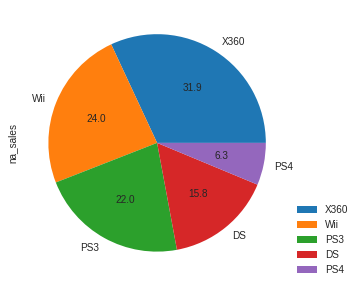

In [30]:
na=actual_games.pivot_table(index='platform', values='na_sales', aggfunc='sum') 
na.sort_values('na_sales', ascending=False).head().plot(kind='pie', subplots=True, figsize=(20,5), autopct='%.1f')
plt.legend(loc=(1,0))
#график распределения 5 самых популярнях платформ в Северной Америке

В северной Америке наиболее популярна приставка Xbox 360. Возможно компания Майкрософт на своем родном рынке имеет большое преимущество перед Сони. Плейстейшн здесь идет на третьем месте вслед за Wii

##### Европа:

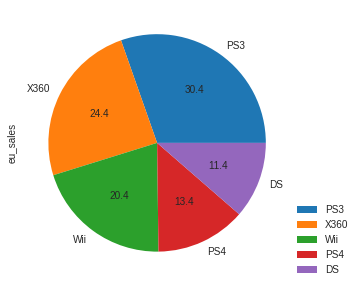

In [31]:
eu=actual_games.pivot_table(index='platform', values='eu_sales', aggfunc='sum') 
eu.sort_values('eu_sales', ascending=False).head().plot(kind='pie', subplots=True, figsize=(20,5), autopct='%.1f')
plt.legend(loc=(1,0))
#график распределения 5 самых популярнях платформ в Европе

В Европе в отличие от Америки более популярна PS3. Wii здесь идет на третьем месте.

##### Япония:

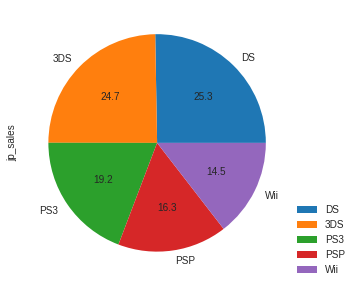

In [32]:
jp=actual_games.pivot_table(index='platform', values='jp_sales', aggfunc='sum') 
jp.sort_values('jp_sales', ascending=False).head().plot(kind='pie', subplots=True, figsize=(20,5), autopct='%.1f')
plt.legend(loc=(1,0))
#график распределения 5 самых популярнях платформ в Японии

В Японии картина совсем другая. Самые популярные консоли - это портативные приставки от Нинтендо и Сони. Xbox от майкрософт даже не попал в пятерку.

#### Самые популярные жанры для каждого региона.

##### Северная Америка:

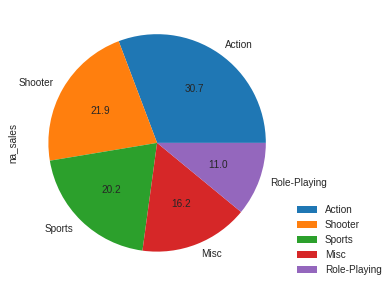

In [33]:
na=actual_games.pivot_table(index='genre', values='na_sales', aggfunc='sum') 
na.sort_values('na_sales', ascending=False).head().plot(kind='pie', subplots=True, figsize=(20,5), autopct='%.1f')
plt.legend(loc=(1,0))
#график распределения 5 самых популярнях жанров в Северной Америке

Самыми популярными жанрами в Америке оказались Action, Shooter, Sports. Как и в целом по миру.

##### Европа:

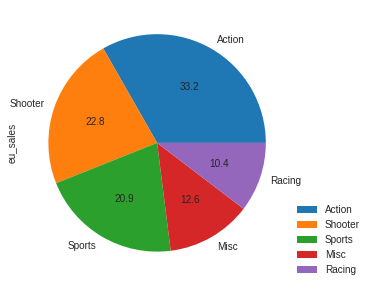

In [34]:
eu=actual_games.pivot_table(index='genre', values='eu_sales', aggfunc='sum') 
eu.sort_values('eu_sales', ascending=False).head().plot(kind='pie', subplots=True, figsize=(20,5), autopct='%.1f')
plt.legend(loc=(1,0))
#график распределения 5 самых популярнях жанров в Европе

Распределение очень похоже на ситуацию в Америке

##### Япония:

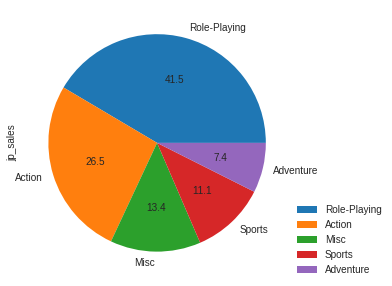

In [35]:
jp=actual_games.pivot_table(index='genre', values='jp_sales', aggfunc='sum') 
jp.sort_values('jp_sales', ascending=False).head().plot(kind='pie', subplots=True, figsize=(20,5), autopct='%.1f')
plt.legend(loc=(1,0))
#график распределения 5 самых популярнях жанров в Японии

В японии ситуация совсем другая.С отрывом лидируют ролевые игры, также в тройку вошли игры смешанного жанра.

#### Влияет ли рейтинг ESRB?

##### Северная Америка:

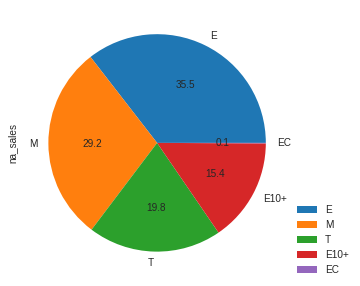

In [36]:
na=actual_games.pivot_table(index='rating', values='na_sales', aggfunc='sum') 
na.sort_values('na_sales', ascending=False).head().plot(kind='pie', subplots=True, figsize=(20,5), autopct='%.1f')
plt.legend(loc=(1,0))
#график распределения 5 самых популярнях рейтингов в Северной Америке

Большинство игр в Северной Америке с рейтингом Е, то есть для детской аудитории. Игры для взрослой аудитории идут на втором месте

##### Европа:

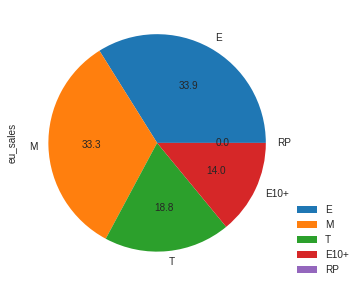

In [37]:
eu=actual_games.pivot_table(index='rating', values='eu_sales', aggfunc='sum') 
eu.sort_values('eu_sales', ascending=False).head().plot(kind='pie', subplots=True, figsize=(20,5), autopct='%.1f')
plt.legend(loc=(1,0))
#график распределения 5 самых популярнях рейтингов в Европе

В целом картина в Европе выгляди почти также как в Америке. Игры для детской аудитории лидируют.

##### Япония:

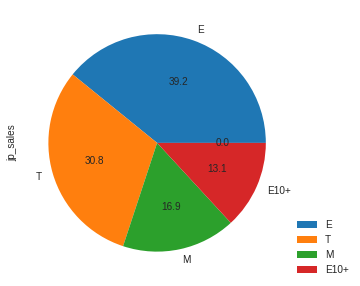

In [38]:
jp=actual_games.pivot_table(index='rating', values='jp_sales', aggfunc='sum') 
jp.sort_values('jp_sales', ascending=False).head().plot(kind='pie', subplots=True, figsize=(20,5), autopct='%.1f')
plt.legend(loc=(1,0))
#график распределения 5 самых популярнях рейтингов в Японии

В Японии заметно хуже продаются игры для взрослой аудитории - М. На втором месте игры для подростков - Т

# Проверьте гипотезы

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Н1 - средние пользовательские рейтинги платформ Xbox One и PC разные

In [39]:
xbox = actual_games.query('platform == "XOne"')['user_score']
pc = actual_games.query('platform == "PC"')['user_score']

In [40]:
alpha = .05  #пороговое значение в 5%

results = st.ttest_ind(xbox, pc, nan_policy='omit') #параметр для игнорирования пропущенных значений

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.05554752084309758
Не получилось отвергнуть нулевую гипотезу


Гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" - подтвердилась. 
pvalue равен ~5.5%, что лишь немного выше порогового значения alpha. 

#### Средние пользовательские рейтинги жанров Action и Sports разные

Н0 - средние пользовательские рейтинги жанров Action и Sports одинаковые

Н1 - средние пользовательские рейтинги жанров Action и Sports отличаются между собой

In [41]:
action = actual_games.query('genre == "Action"')
sports = actual_games.query('genre == "Sports"')

In [42]:
alpha = .05
results = st.ttest_ind(action['user_score'], sports['user_score'], nan_policy='omit')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.089451491957169e-12
Отвергаем нулевую гипотезу


Гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные" - подтвердилась.

# Вывод

За весь проделанный анализ можно выявить несколько основных моментов - 

На выручку больше влияют оценки критиков, чем пользователей. 

Жизненый цикл платформы составляет 10 лет.

На данный момент PS4 и XOne обладают самым большим потенциалом.

В Европе и Америке более популярные жанры Экшн и Шутер. Япония сильно отличается от европейской цивилизации. 

Игры, разрешеные для детей гораздо лучше продаются.

Из этих мыслей следует исходить чтобы провести удачнкую рекламную кампанию и сделать ставку на потенциально популярный продукт.

Обе гипотезы подтвердились - 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Средние пользовательские рейтинги жанров Action и Sports разные